## Text Mining and NLP: Star Wars Scripts

In [1]:
# Importing libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import shlex
import multidict as multidict
import re
from PIL import Image
from wordcloud import WordCloud
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer

### Extracting Data to Structured Format

In [2]:
# Creating a function to extract data from each episode txt file
def extract_data(filename):
    # Read file
    with open(filename, 'r', encoding = 'utf-8') as file:
        lines = file.readlines()

    # Creating empty tuples
    line_num = []
    character = []
    dialogue = [] 

    # Loop to extract each element from each line
    for line_number, line in enumerate(lines[1:], start = 1):
        strip_line = line.strip()
        if not strip_line:
            continue
        parts = shlex.split(strip_line)
        if len(parts) == 3:
            line_num.append(int(parts[0]))
            character.append(parts[1])
            dialogue.append(parts[2])

    # Creating into dataframe
    df = pd.DataFrame({
        'line_num' : line_num,
        'character' : character,
        'dialogue' : dialogue
    })
    
    # Returning final dataframe
    return df
    

In [3]:
# Extracting all episode scripts
ep4 = extract_data('C:/Users/hp/OneDrive - Högskolan Dalarna/Business Intelligence/Lab4_NLP/Lab4_dataset/star_wars_movies_scripts/SW_EpisodeIV.txt')
ep5 = extract_data('C:/Users/hp/OneDrive - Högskolan Dalarna/Business Intelligence/Lab4_NLP/Lab4_dataset/star_wars_movies_scripts/SW_EpisodeV.txt')
ep6 = extract_data('C:/Users/hp/OneDrive - Högskolan Dalarna/Business Intelligence/Lab4_NLP/Lab4_dataset/star_wars_movies_scripts/SW_EpisodeVI.txt')

# Adding variable episode
ep4['episode'] = 'IV'
ep5['episode'] = 'V'
ep6['episode'] = 'VI'

# Concatenating to one script
scripts = pd.concat([ep4, ep5, ep6], ignore_index = True)

### Characters With the Most Number of Dialogues

In [4]:
# Counting the dialogues
ch_count_ep4 = ep4['character'].value_counts().sort_values(ascending = False)
ch_count_ep5 = ep5['character'].value_counts().sort_values(ascending = False)
ch_count_ep6 = ep6['character'].value_counts().sort_values(ascending = False)

# Top 3 characters with most dialogues
print(ch_count_ep4.head(3))
print(ch_count_ep5.head(3))
print(ch_count_ep6.head(3))

character
LUKE        254
HAN         153
THREEPIO    119
Name: count, dtype: int64
character
HAN     182
LUKE    128
LEIA    114
Name: count, dtype: int64
character
HAN         124
LUKE        112
THREEPIO     90
Name: count, dtype: int64


### Plotting to Visualize Characters with Most Dialogues

In [5]:
# Creating bar plot function
def plots(ep, ch_count):
    plt.figure(figsize=(8, 4))
    ch_count.head(5).plot(kind='bar')
    plt.title(f"Top 5: Most Dialogues in {ep}")
    plt.xlabel('Character')
    plt.ylabel('Count')
    plt.xticks(rotation=1)  # Keep labels horizontal
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

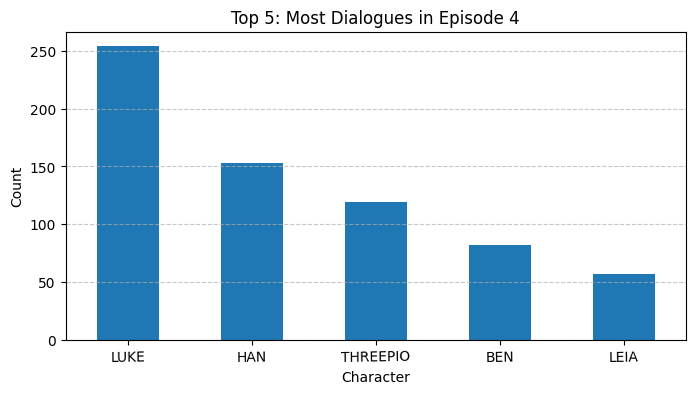

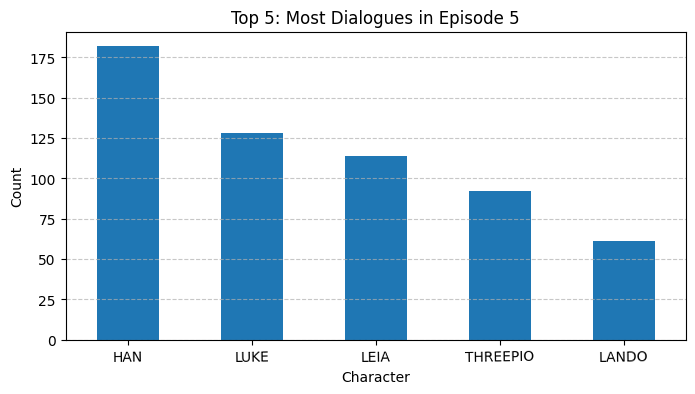

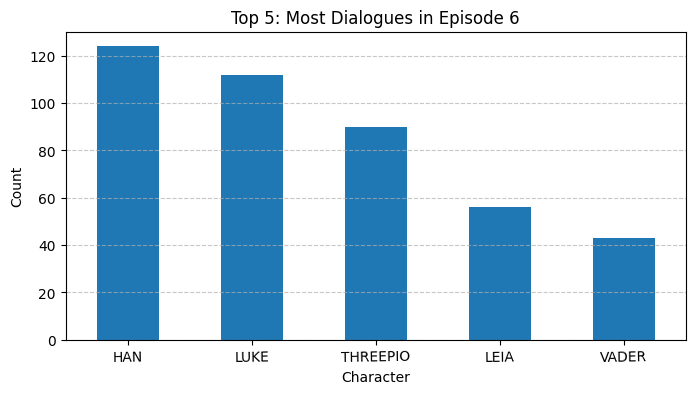

In [6]:
# Plots
plots("Episode 4", ch_count_ep4)
plots("Episode 5", ch_count_ep5)
plots("Episode 6", ch_count_ep6)

Comments: From these bar plots it can be said that Han, Luke, Threepio and Leia are important characters as they have the most dialogues in each episode

### Frequency Distribution of All Words

In [7]:
# Combining all dialogues
all_text = ' '.join(scripts['dialogue'].dropna().astype(str))
all_text

'Did you hear that?  They\'ve shut down the main reactor.  We\'ll be destroyed for sure.  This is madness! We\'re doomed! There\'ll be no escape for the Princess this time. What\'s that? I should have known better than to trust the logic of a half-sized thermocapsulary dehousing assister... Hurry up!  Come with me!  What are you waiting for?!  Get in gear! Artoo! Artoo-Detoo, where are you? At last!  Where have you been? They\'re heading in this direction. What are we going to do?  We\'ll be sent to the spice mines of Kessel or smashed into who knows what! Wait a minute, where are you going? The Death Star plans are not in the main computer. Where are those transmissions you intercepted? We intercepted no transmissions. Aaah...  This is a consular ship. Were on a diplomatic mission. If this is a consular ship... where is the Ambassador? Commander, tear this ship apart until you\'ve found those plans and bring me the Ambassador.  I want her alive! There she is! Set for stun! She\'ll be 

In [8]:
# Function to create dictionary of all words in the dialogues with punctuations
def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

# Getting frequency of all words
freq = getFrequencyDictForText(all_text)
freq


<MultiDict('did': 4, 'you': 1, 'hear': 2, 'that?': 12, '': 1053, 'they've': 1, 'shut': 1, 'down': 28, 'the': 14, 'main': 17, 'reactor.': 3, 'we'll': 1, 'be': 110, 'destroyed': 3, 'for': 71, 'sure.': 5, 'this': 7, 'is': 26, 'madness!': 1, 'we're': 2, 'doomed!': 2, 'there'll': 1, 'no': 12, 'escape': 4, 'princess': 1, 'time.': 22, 'what's': 1, 'i': 1, 'should': 11, 'have': 120, 'known': 4, 'better': 8, 'than': 22, 'to': 91, 'trust': 1, 'logic': 2, 'of': 106, 'a': 31, 'half-sized': 1, 'thermocapsulary': 1, 'dehousing': 1, 'assister...': 1, 'hurry': 2, 'up!': 5, 'come': 1, 'with': 5, 'me!': 10, 'what': 2, 'are': 10, 'waiting': 6, 'for?!': 1, 'get': 3, 'in': 8, 'gear!': 1, 'artoo!': 1, 'artoo-detoo,': 1, 'where': 3, 'you?': 28, 'at': 4, 'last!': 2, 'been?': 3, 'they're': 1, 'heading': 4, 'direction.': 2, 'we': 1, 'going': 69, 'do?': 1, 'sent': 3, 'spice': 2, 'mines': 1, 'kessel': 1, 'or': 11, 'smashed': 1, 'into': 19, 'who': 9, 'knows': 4, 'what!': 2, 'wait': 3, 'minute,': 1, 'going?': 1, 'd

In [9]:
# Sorting it in decreasing order
sorted_freq = sorted(freq.items(), key = lambda x:x[1], reverse = True)
sorted_freq

# Turning into dataframe
freq_df = pd.DataFrame(sorted_freq, columns = ['Word', 'Count'])
freq_df

,Word,Count
0,,1053
1,have,120
2,be,110
3,of,106
4,out,92
...,...,...
4670,promised,1
4671,scratch...i,1
4672,pirate,1
4673,forgives,1


<Figure size 800x400 with 0 Axes>

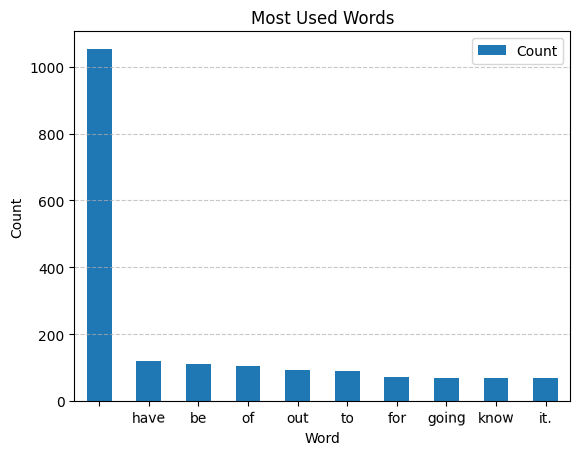

In [10]:
# Plotting Frequency
plt.figure(figsize=(8, 4))
freq_df.head(10).plot(kind ='bar', x = 'Word', y = 'Count')
plt.title("Most Used Words")
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=1)  # Keep labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Frequency of All Words After Text Mining and Pre-Processing

In [11]:
# create preprocess_text function
def preprocess_text(text):
    # Remove punctuations
    text = re.sub(r'[^a-zA-Z]', ' ', str(text).lower())
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens if len(token)>2]
    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

# apply the function df
scripts['new_script'] = scripts['dialogue'].apply(preprocess_text)
scripts

,line_num,character,dialogue,episode,new_script
0,1,THREEPIO,Did you hear that? They've shut down the main...,IV,hear shut main reactor destroyed sure madness
1,2,THREEPIO,We're doomed!,IV,doomed
2,3,THREEPIO,There'll be no escape for the Princess this time.,IV,escape princess time
3,4,THREEPIO,What's that?,IV,
4,5,THREEPIO,I should have known better than to trust the l...,IV,known better trust logic half sized thermocaps...
...,...,...,...,...,...
2518,670,LANDO,"Wedge, I don't think we're going to make it.",VI,wedge think going make
2519,671,WEDGE,You'll make it. Just follow me Gold Leader.,VI,make follow gold leader
2520,672,LANDO,I promised to return his ship without a scratc...,VI,promised return ship without scratch sure hope...
2521,673,HAN,Lando...,VI,lando


<Figure size 800x400 with 0 Axes>

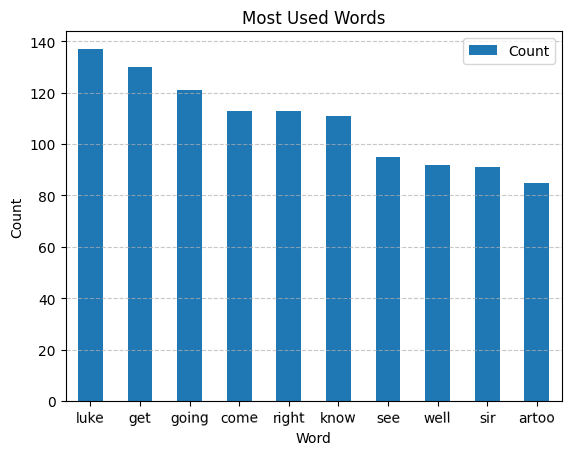

In [12]:
# Combining new script
all_text_pp = ' '.join(scripts['new_script'].dropna().astype(str))
all_text_pp

# Getting frequency of all words
freq = getFrequencyDictForText(all_text_pp)
freq

# Sorting it in decreasing order
sorted_freq = sorted(freq.items(), key = lambda x:x[1], reverse = True)
sorted_freq

# Turning into dataframe
freq_df = pd.DataFrame(sorted_freq, columns = ['Word', 'Count'])
freq_df

# Plotting Frequency
plt.figure(figsize=(8, 4))
freq_df.head(10).plot(kind ='bar', x = 'Word', y = 'Count')
plt.title("Most Used Words")
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=1)  # Keep labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Word Clouds for Vader and Yoda

In [13]:
# Dataframes for dialogues of Vader and Yoda
Vader_df = scripts[scripts['character'] == 'VADER']
Yoda_df = scripts[scripts['character'] == 'YODA']

# Vader and Yoda dialogues
Vader_dlg = ' '.join(Vader_df['new_script'].dropna().astype(str))
Yoda_dlg = ' '.join(Yoda_df['new_script'].dropna().astype(str))

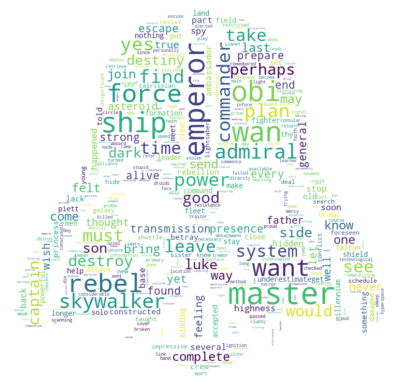

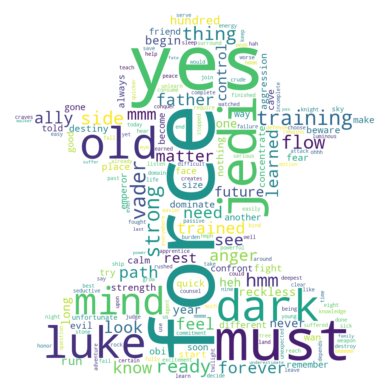

In [14]:
# Creating word cloud based on Vader and Yoda mask
def makeImage(text, path):
    alice_mask = np.array(Image.open(path))

    wc = WordCloud(background_color="white", max_words=1000, mask=alice_mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
# Path of masks
Vader_path = 'C:/Users/hp/OneDrive - Högskolan Dalarna/Business Intelligence/Lab4_NLP/Lab4_dataset/wordcloud_masks/vader.jpg'
Yoda_path = 'C:/Users/hp/OneDrive - Högskolan Dalarna/Business Intelligence/Lab4_NLP/Lab4_dataset/wordcloud_masks/yoda.png'

# Creating mask word clouds
makeImage(getFrequencyDictForText(Vader_dlg), Vader_path)
makeImage(getFrequencyDictForText(Yoda_dlg), Yoda_path)

Comments: 
The common words used by Vader :- master, emperor, ship, obi, rebel, dark, destroy, power, force highlight Sith themes such as power, hierarchy, the Force and conflict 
The common words used by Yoda :- jedi, yes, dark, old, must, force, mind, training, strong, future these highlight training, discipline and philosophical.

### Most Relevant Words

In [15]:
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(scripts['new_script'])

# Show top words by TF-IDF score
tfidf_scores = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())
top_words = tfidf_scores.mean().sort_values(ascending=False).head(20)
print(top_words)


luke      0.020090
come      0.018993
get       0.018189
going     0.018174
right     0.018173
yes       0.016589
know      0.016410
sir       0.015140
see       0.015032
artoo     0.014037
chewie    0.013010
well      0.012513
got       0.012507
good      0.011331
one       0.010916
back      0.010595
let       0.010509
look      0.010380
take      0.010379
think     0.010270
dtype: float64


### Sentiment Analysis on Movie Scripts, Sith and Jedi characters

In [16]:
# Initializing Vader Sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Applying sentiment to every dialogue
scripts['sentiment'] = scripts['dialogue'].apply(get_sentiment)

# Script mean sentiment
print("Script Average Sentiment:", scripts['sentiment'].mean())


Script Average Sentiment: 0.04755548949663099


Comments: Average sentiment of the scripts is neutral as the score is between -0.05 and 0.05. Might be slightly positive as it is more towards 0.05

In [17]:
# Comparison for Sith vs Jedi
sith = scripts[scripts['character'].isin(['VADER', 'EMPEROR'])]
jedi = scripts[scripts['character'].isin(['YODA', 'LUKE', 'HAN'])]

# Mean sentiment Sith vs Jedi
print("Sith Average Sentiment:", sith['sentiment'].mean())
print("Jedi Average Sentiment:", jedi['sentiment'].mean())

Sith Average Sentiment: 0.050775543478260875
Jedi Average Sentiment: 0.07803852295409182


Comments: Average sentiment for the Sith using Vader library is neutral slightly towards positivity (>0.05 but near 0.05) while for Jedi is positive (>0.05)